## Homework 05: due 2024/05/27 23:59(100%)

### - There are differences between every OpenCV version, please make sure the version is above 4.0.0 to avoid the bugs. 

### - Tutorial : 
1. Feature extraction and matching: https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html
2. Feature detectors (ORB & FAST): https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 1. Feature detector (40%)
### Please use the following feature detectors (FAST, ORB, SIFT) and draw the feature points on the __test1.jpg__ images and write down your observation
#### (Example figure)
![Imgur](https://imgur.com/5hVZ8v9.jpg)


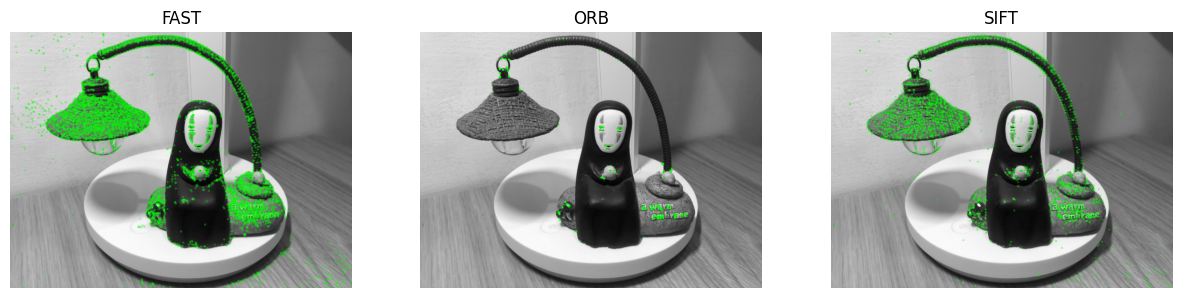

In [2]:
img = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create()
orb = cv2.ORB_create()
sift = cv2.SIFT_create()

kp = list()
kp.append(fast.detect(img,None))
kp.append(orb.detect(img,None))
kp.append(sift.detect(img,None))

img2 = list()
for i in kp:
    img2.append(cv2.drawKeypoints(img, i, None, color=(0, 255, 0)))

fig, axs = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    axs[i].imshow(img2[i])
    axs[i].set_title(['FAST', 'ORB', 'SIFT'][i])
    axs[i].axis('off')

plt.show()

## Answer:
- **FAST** is the fastest and detects the highest number of keypoints but lacks orientation and scale information.
- **ORB** balances speed and robustness, providing orientation and scale while detecting a moderate number of keypoints.
- **SIFT** detects keypoints in distinctive areas with robust features, providing orientation and scale, but is slower compared to FAST and ORB.

## 2. Feature matching (60%)
### Please match the feature points from the __test1.jpg__ and __test2.jpg__. Also, please apply Lowe's ratio test (with ratio 0.6 and 0.8) to match the features and observe the differences when adjusting the ratio.
### 2.1 Please use __SIFT__ as feature detector and descriptor and write down your observation.(30%) 
#### (Example figure)
![Imgur](https://imgur.com/zspvzKG.jpg)


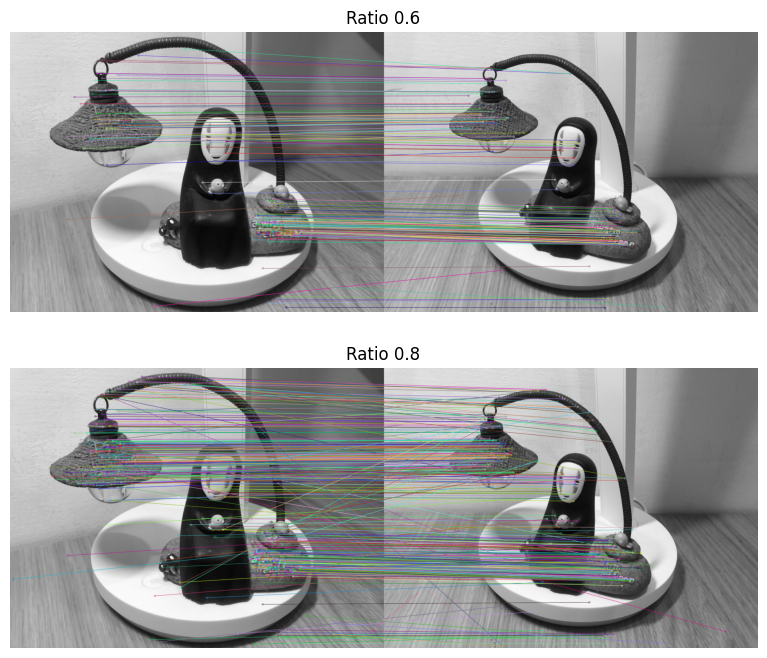

In [3]:
img1 = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test2.jpg', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good1 = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good1.append([m])
        
good2 = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good2.append([m])

img3 = list()
img3.append(cv2.drawMatchesKnn(img1, kp1, img2, kp2, good1, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
img3.append(cv2.drawMatchesKnn(img1, kp1, img2, kp2, good2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
 
fig, axs = plt.subplots(2, 1, figsize=(10,8))
for i in range(2):
    axs[i].imshow(img3[i])
    axs[i].set_title('Ratio ' + ['0.6', '0.8'][i])
    axs[i].axis('off')
plt.show()

## Answer:
- The ratio test is used to filter out poor matches by comparing the distance of the closest match to the distance of the second closest match. A lower ratio indicates stricter filtering.
- A ratio of 0.6 provides higher precision by accepting matches only when the closest match is significantly better than the second closest.
- A ratio of 0.8 allows for more matches but can include less reliable ones, making it a trade-off between the quantity and quality of matches.

### 2.2 Please use __ORB__ as feature detector and descriptor and write down your observation.(30%) 
#### (Example figure)
![Imgur](https://imgur.com/3ZtQii2.jpg)

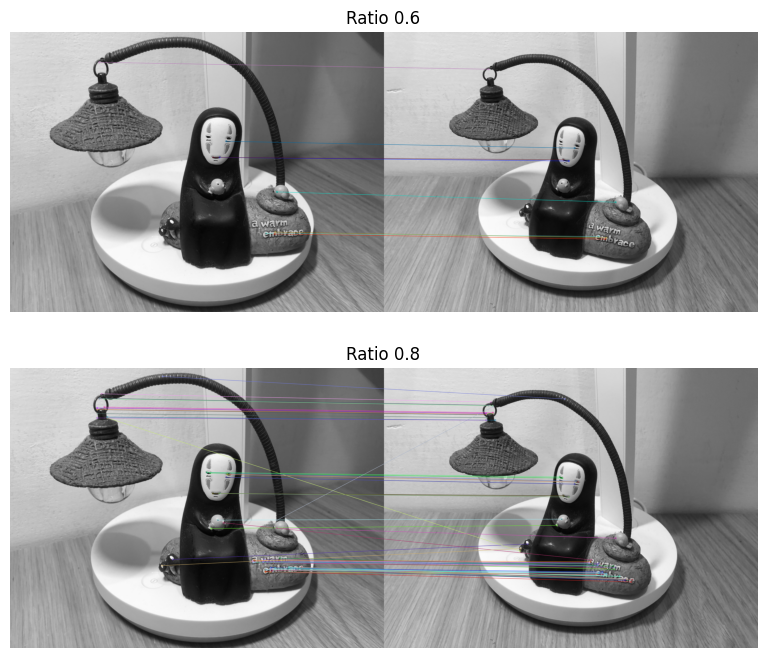

In [4]:
img1 = cv2.imread('test1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test2.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

good1 = []
for m, n in matches:
    if m.distance < 0.6 * n.distance:
        good1.append([m])
        
good2 = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good2.append([m])

img3 = list()
img3.append(cv2.drawMatchesKnn(img1, kp1, img2, kp2, good1, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
img3.append(cv2.drawMatchesKnn(img1, kp1, img2, kp2, good2, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
 
fig, axs = plt.subplots(2, 1, figsize=(10,8))
for i in range(2):
    axs[i].imshow(img3[i])
    axs[i].set_title('Ratio ' + ['0.6', '0.8'][i])
    axs[i].axis('off')
plt.show()

## Answer:
The choice between SIFT and ORB depends on the specific requirements of the application. SIFT is preferred for tasks demanding high accuracy and robustness, while ORB is chosen for real-time applications requiring speed and computational efficiency.